# COVID-19 Cases Data Vizualisation Notebook
------------------

### Importing Libraries

In [98]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import seaborn as sns
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [99]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [100]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [101]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [102]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,79,79,79,80,80,81,81,82,82,83
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,372,379,382,384,386,387,390,393,393,393


#### Check the shape of the dataframes

In [103]:
confirmed_df.shape

(271, 342)

In [104]:
recoveries_df.shape

(256, 342)

In [105]:
deaths_df.shape

(271, 342)

### Delete the useless columns

In [106]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,Albania,0,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,Algeria,0,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,Andorra,0,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,Angola,0,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [107]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
1,Albania,0,0,0,0,0,0,0,0,0,...,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
2,Algeria,0,0,0,0,0,0,0,0,0,...,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
3,Andorra,0,0,0,0,0,0,0,0,0,...,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
4,Angola,0,0,0,0,0,0,0,0,0,...,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [108]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
1,Albania,0,0,0,0,0,0,0,0,0,...,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
2,Algeria,0,0,0,0,0,0,0,0,0,...,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
3,Andorra,0,0,0,0,0,0,0,0,0,...,79,79,79,80,80,81,81,82,82,83
4,Angola,0,0,0,0,0,0,0,0,0,...,372,379,382,384,386,387,390,393,393,393


### Aggregate rows by Country

In [109]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
Albania,0,0,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
Algeria,0,0,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
Andorra,0,0,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
Angola,0,0,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [110]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
Albania,0,0,0,0,0,0,0,0,0,0,...,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
Algeria,0,0,0,0,0,0,0,0,0,0,...,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
Andorra,0,0,0,0,0,0,0,0,0,0,...,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
Angola,0,0,0,0,0,0,0,0,0,0,...,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [111]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
Albania,0,0,0,0,0,0,0,0,0,0,...,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
Algeria,0,0,0,0,0,0,0,0,0,0,...,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
Andorra,0,0,0,0,0,0,0,0,0,0,...,79,79,79,80,80,81,81,82,82,83
Angola,0,0,0,0,0,0,0,0,0,0,...,372,379,382,384,386,387,390,393,393,393


#### Check the shape of the new dataframes

In [112]:
confirmed_df_aggregated.shape

(191, 338)

In [113]:
recoveries_df_aggregated.shape

(191, 338)

In [114]:
deaths_df_aggregated.shape

(191, 338)

### Visualizing Europe confirmed cases

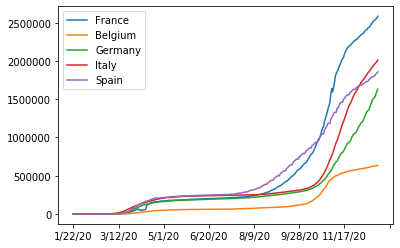

In [115]:
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
plt.legend()
plt.savefig("img/confirmed-europe.png")
plt.show()

### Visualizing Europe recoveries cases

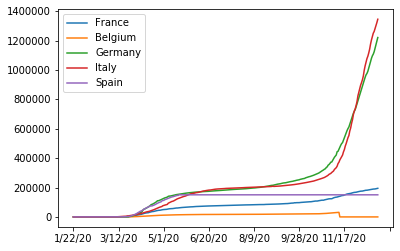

In [116]:
recoveries_df_aggregated.loc ["France"].plot()
recoveries_df_aggregated.loc ["Belgium"].plot()
recoveries_df_aggregated.loc ["Germany"].plot()
recoveries_df_aggregated.loc ["Italy"].plot()
recoveries_df_aggregated.loc ["Spain"].plot()
plt.legend()
plt.savefig("img/recoveries-europe.png")
plt.show()

### Visualizing Europe deaths cases

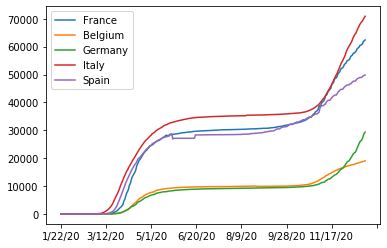

In [117]:
deaths_df_aggregated.loc ["France"].plot()
deaths_df_aggregated.loc ["Belgium"].plot()
deaths_df_aggregated.loc ["Germany"].plot()
deaths_df_aggregated.loc ["Italy"].plot()
deaths_df_aggregated.loc ["Spain"].plot()
plt.legend()
plt.savefig("img/deaths-europe.png")
plt.show()

### Visualizing Asia confirmed cases 

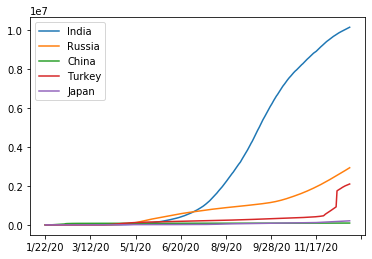

In [118]:
confirmed_df_aggregated.loc ["India"].plot()
confirmed_df_aggregated.loc ["Russia"].plot()
confirmed_df_aggregated.loc ["China"].plot()
confirmed_df_aggregated.loc ["Turkey"].plot()
confirmed_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/confirmed-asia.png')
plt.show()

### Visualizing Asia recoveries cases

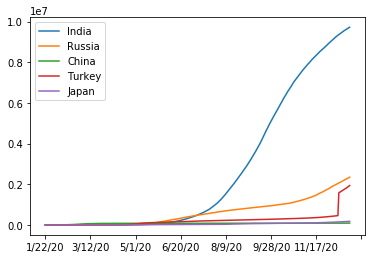

In [119]:
recoveries_df_aggregated.loc ["India"].plot()
recoveries_df_aggregated.loc ["Russia"].plot()
recoveries_df_aggregated.loc ["China"].plot()
recoveries_df_aggregated.loc ["Turkey"].plot()
recoveries_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/recoveries-asia.png')
plt.show()

### Visualizing Asia deaths cases

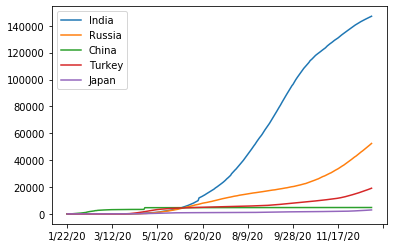

In [120]:
deaths_df_aggregated.loc ["India"].plot()
deaths_df_aggregated.loc ["Russia"].plot()
deaths_df_aggregated.loc ["China"].plot()
deaths_df_aggregated.loc ["Turkey"].plot()
deaths_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/deaths-asia.png')
plt.show()

### Visualizing Africa confirmed cases

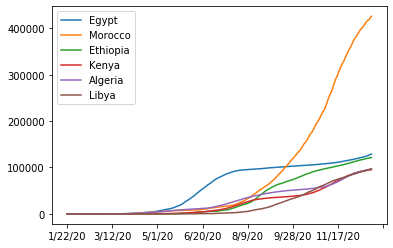

In [121]:
confirmed_df_aggregated.loc ["Egypt"].plot()
confirmed_df_aggregated.loc ["Morocco"].plot()
confirmed_df_aggregated.loc ["Ethiopia"].plot()
confirmed_df_aggregated.loc ["Kenya"].plot()
confirmed_df_aggregated.loc ["Algeria"].plot()
confirmed_df_aggregated.loc ["Libya"].plot()
plt.legend()
plt.savefig('img/confirmed-africa.png')
plt.show()

### Visualizing  Africa recoveries cases

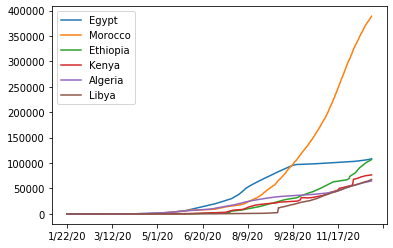

In [122]:
recoveries_df_aggregated.loc ["Egypt"].plot()
recoveries_df_aggregated.loc ["Morocco"].plot()
recoveries_df_aggregated.loc ["Ethiopia"].plot()
recoveries_df_aggregated.loc ["Kenya"].plot()
recoveries_df_aggregated.loc ["Algeria"].plot()
recoveries_df_aggregated.loc ["Libya"].plot()
plt.legend()
plt.savefig('img/recoveries-africa.png')
plt.show()

### Visualizing Africa deaths cases

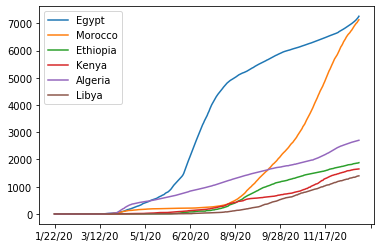

In [123]:
deaths_df_aggregated.loc ["Egypt"].plot()
deaths_df_aggregated.loc ["Morocco"].plot()
deaths_df_aggregated.loc ["Ethiopia"].plot()
deaths_df_aggregated.loc ["Kenya"].plot()
deaths_df_aggregated.loc ["Algeria"].plot()
deaths_df_aggregated.loc ["Libya"].plot()
plt.legend()
plt.savefig('img/deaths-africa.png')
plt.show()

### Visualizing North America confirmed cases

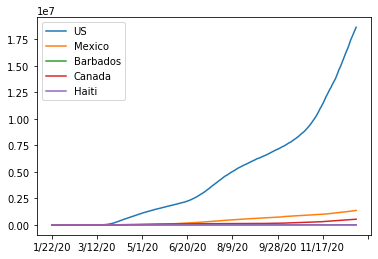

In [124]:
confirmed_df_aggregated.loc ["US"].plot()
confirmed_df_aggregated.loc ["Mexico"].plot()
confirmed_df_aggregated.loc ["Barbados"].plot()
confirmed_df_aggregated.loc ["Canada"].plot()
confirmed_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/confirmed-northamerica.png')
plt.show()

### Visualizing North America recoveries cases

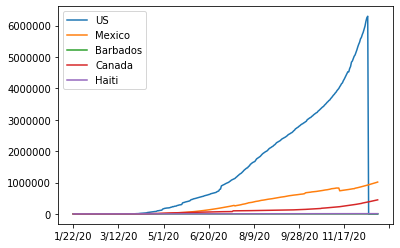

In [125]:
recoveries_df_aggregated.loc ["US"].plot()
recoveries_df_aggregated.loc ["Mexico"].plot()
recoveries_df_aggregated.loc ["Barbados"].plot()
recoveries_df_aggregated.loc ["Canada"].plot()
recoveries_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/recoveries-northamerica.png')
plt.show()

### Visualizing North America deaths cases

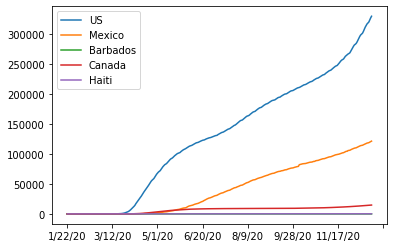

In [126]:
deaths_df_aggregated.loc ["US"].plot()
deaths_df_aggregated.loc ["Mexico"].plot()
deaths_df_aggregated.loc ["Barbados"].plot()
deaths_df_aggregated.loc ["Canada"].plot()
deaths_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/deaths-northamerica.png')
plt.show()

### Visualizing South America confirmed cases

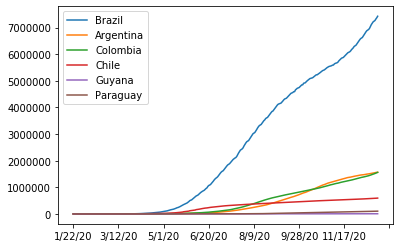

In [127]:
confirmed_df_aggregated.loc ["Brazil"].plot()
confirmed_df_aggregated.loc ["Argentina"].plot()
confirmed_df_aggregated.loc ["Colombia"].plot()
confirmed_df_aggregated.loc ["Chile"].plot()
confirmed_df_aggregated.loc ["Guyana"].plot()
confirmed_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/confirmed-southamerica.png')
plt.show()

### Visualizing South America recoveries cases

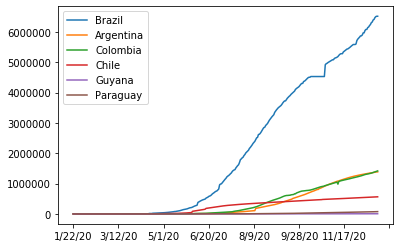

In [128]:
recoveries_df_aggregated.loc ["Brazil"].plot()
recoveries_df_aggregated.loc ["Argentina"].plot()
recoveries_df_aggregated.loc ["Colombia"].plot()
recoveries_df_aggregated.loc ["Chile"].plot()
recoveries_df_aggregated.loc ["Guyana"].plot()
recoveries_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/recoveries-southamerica.png')
plt.show()

### Visualizing South America deaths cases

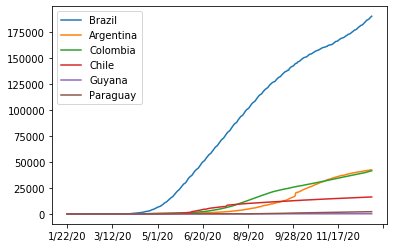

In [129]:
deaths_df_aggregated.loc ["Brazil"].plot()
deaths_df_aggregated.loc ["Argentina"].plot()
deaths_df_aggregated.loc ["Colombia"].plot()
deaths_df_aggregated.loc ["Chile"].plot()
deaths_df_aggregated.loc ["Guyana"].plot()
deaths_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/deaths-southamerica.png')
plt.show()

### Visualizing Oceania confirmed cases

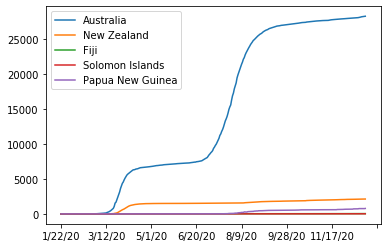

In [130]:
confirmed_df_aggregated.loc ["Australia"].plot()
confirmed_df_aggregated.loc ["New Zealand"].plot()
confirmed_df_aggregated.loc ["Fiji"].plot()
confirmed_df_aggregated.loc ["Solomon Islands"].plot()
confirmed_df_aggregated.loc ["Papua New Guinea"].plot()
plt.legend()
plt.savefig('img/confirmed-oceania.png')
plt.show()

### Visualizing Oceania recoveries cases

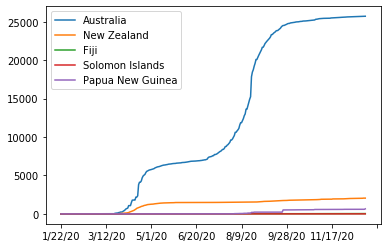

In [131]:
recoveries_df_aggregated.loc ["Australia"].plot()
recoveries_df_aggregated.loc ["New Zealand"].plot()
recoveries_df_aggregated.loc ["Fiji"].plot()
recoveries_df_aggregated.loc ["Solomon Islands"].plot()
recoveries_df_aggregated.loc ["Papua New Guinea"].plot()
plt.legend()
plt.savefig('img/recoveries-oceania.png')
plt.show()

### Visualizing Oceania deaths cases

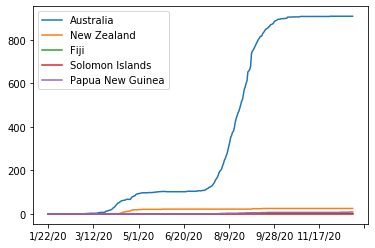

In [132]:
deaths_df_aggregated.loc ["Australia"].plot()
deaths_df_aggregated.loc ["New Zealand"].plot()
deaths_df_aggregated.loc ["Fiji"].plot()
deaths_df_aggregated.loc ["Solomon Islands"].plot()
deaths_df_aggregated.loc ["Papua New Guinea"].plot()
plt.legend()
plt.savefig('img/deaths-oceania.png')
plt.show()

### Calculating a good measure describing the spread of the virus 

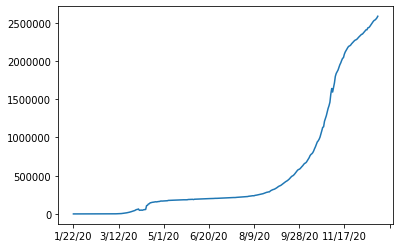

In [133]:
confirmed_df_aggregated.loc['France'].plot()

### Calculating the first derivative of the curve

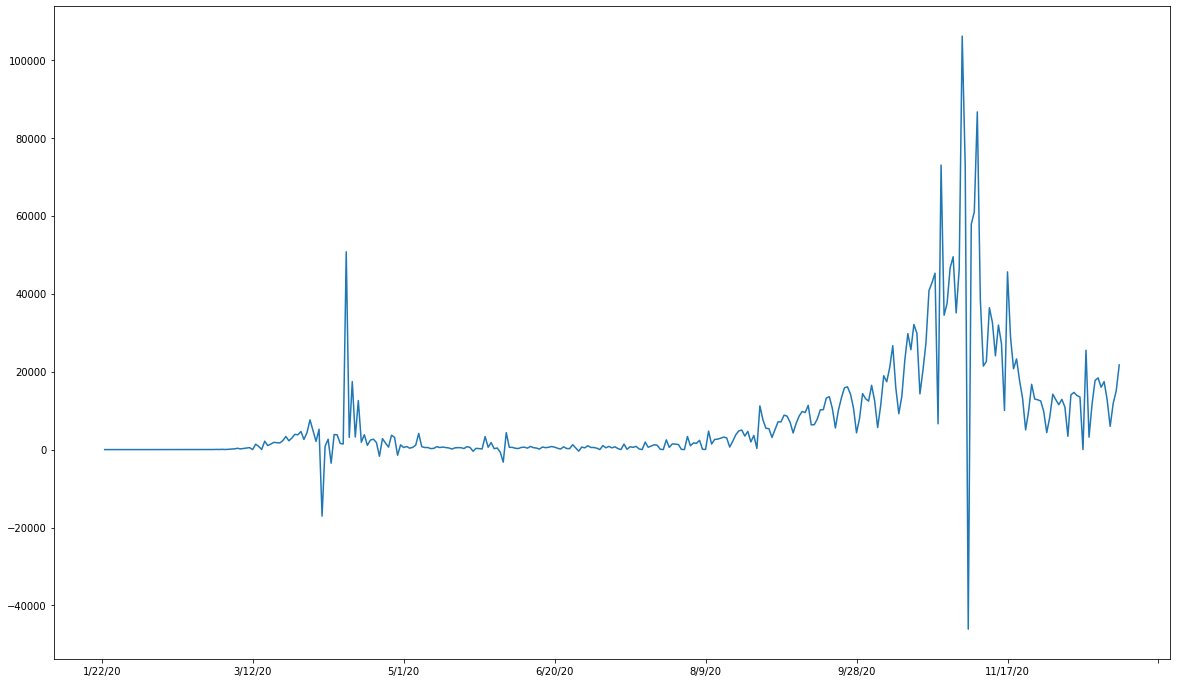

In [134]:
confirmed_df_aggregated.loc['France'].diff().plot(figsize=(20,12))
plt.savefig('img/curve-fr.png')
# plot line of best fit
plt.show()

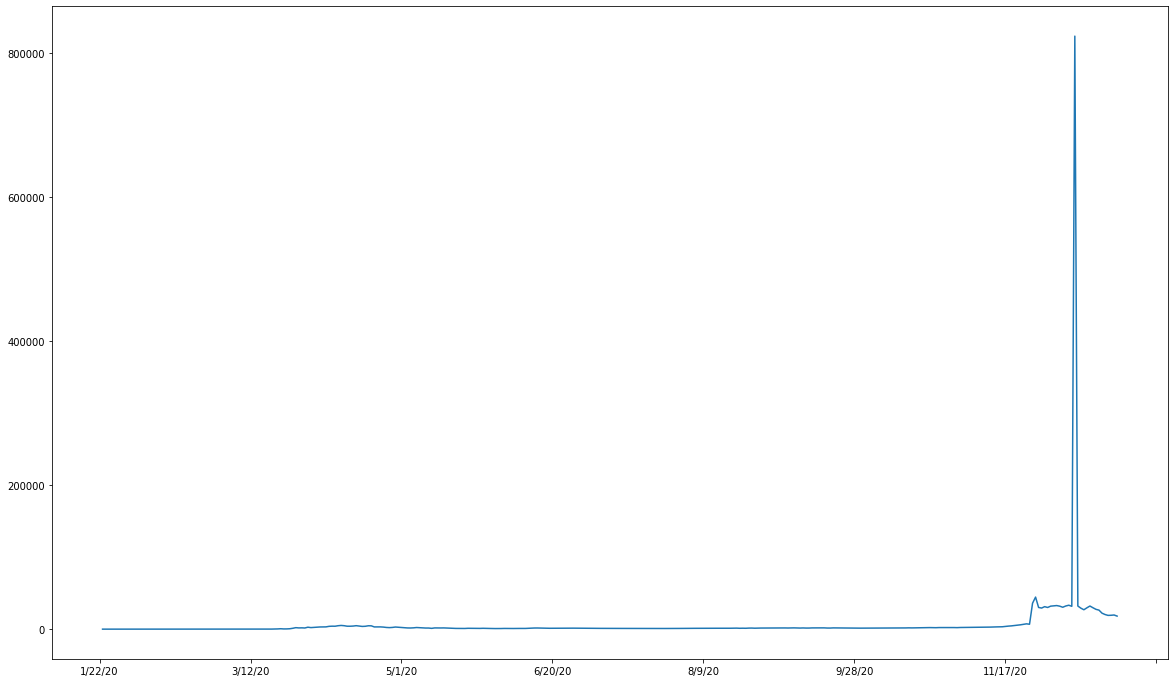

In [135]:
confirmed_df_aggregated.loc['Turkey'].diff().plot(figsize=(20,12))
plt.savefig('img/curve-tr.png')
# plot line of best fit
plt.show()

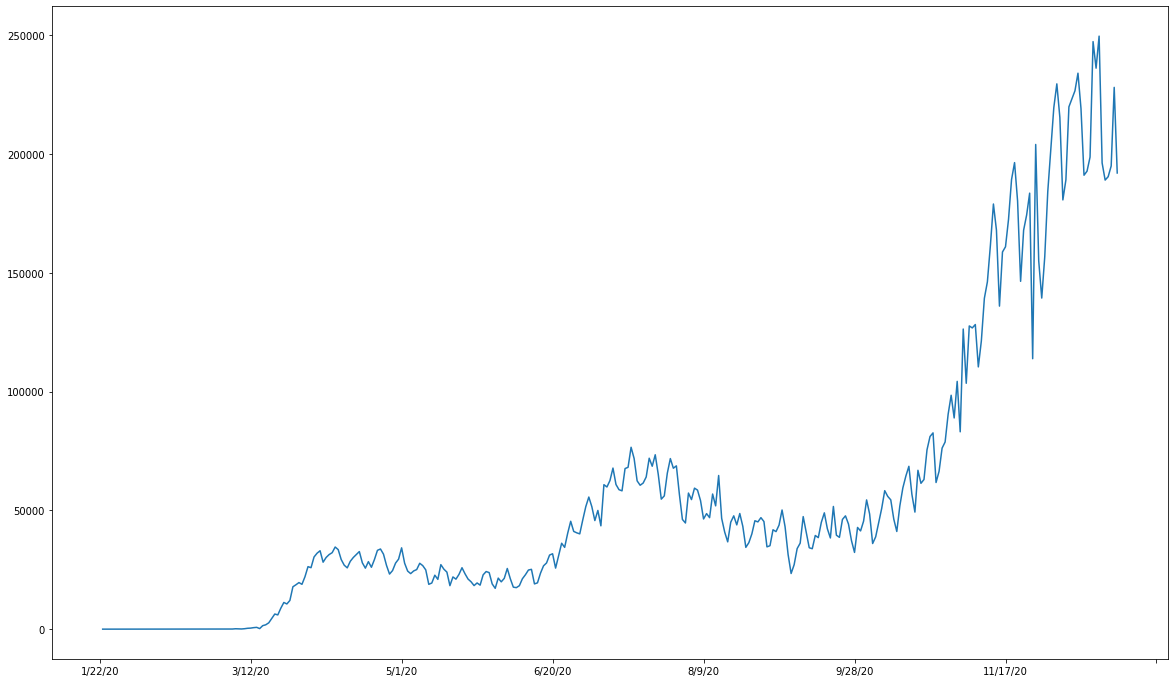

In [136]:
confirmed_df_aggregated.loc['US'].diff().plot(figsize=(20,12))
plt.savefig('img/curve-us.png')

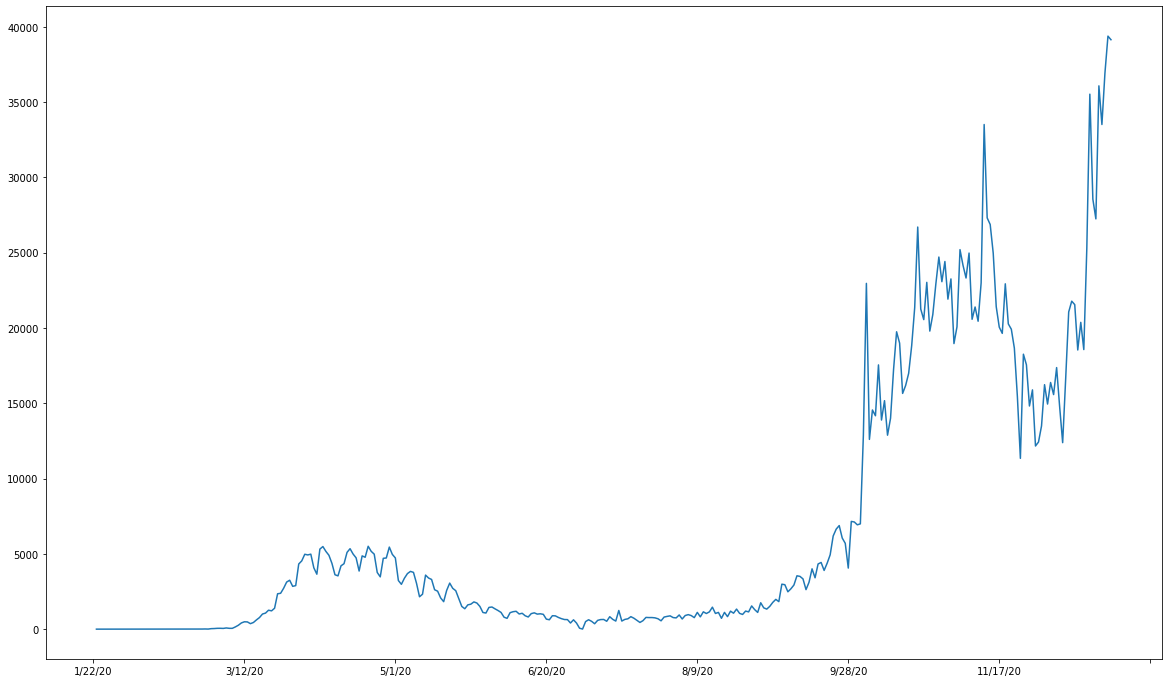

In [137]:
confirmed_df_aggregated.loc['United Kingdom'].diff().plot(figsize=(20,12))
plt.savefig('img/curve-uk.png')

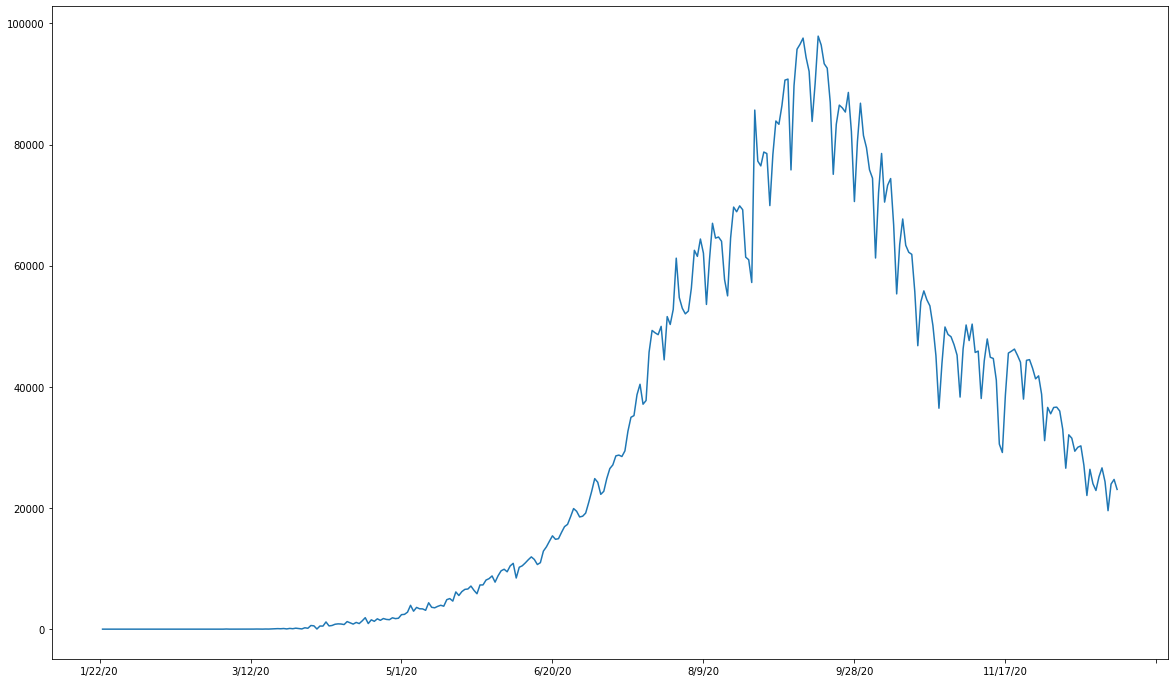

In [138]:
confirmed_df_aggregated.loc['India'].diff().plot(figsize=(20,12))
plt.savefig('img/curve-in.png')

### Find maximum infection rate for France

In [139]:
confirmed_df_aggregated.loc['France'].diff().max()

106091.0

### Find maximum infection rate for all countries. 

In [140]:
countries = list(confirmed_df_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(confirmed_df_aggregated.loc[c].diff().max())
confirmed_df_aggregated["max_infection_rate"] = max_infection_rates

In [141]:
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,49161,49378,49621,49681,49817,50013,50190,50433,50655,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,50637,51424,52004,52542,53003,53425,53814,54317,54827,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,93507,93933,94371,94781,95203,95659,96069,96549,97007,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7446,7466,7519,7560,7577,7602,7633,7669,7699,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,16407,16484,16562,16626,16644,16686,16802,16931,17029,355.0


### Create a new dataframe with maximum infection rate

In [142]:
confirmed_data=pd.DataFrame(confirmed_df_aggregated["max_infection_rate"])

In [143]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=False).head()
max_infection

,max_infection_rate
Country/Region,
Turkey,823225.0
US,249709.0
France,106091.0
India,97894.0
Brazil,70574.0


In [144]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=True).tail(20)

In [145]:
fig = px.bar(max_infection, x='max_infection_rate',y=max_infection.index,title='Countries with maximum infection rate', color='max_infection_rate', orientation='h')
fig.write_image("img/Countries-infection-rate.png", width=1960, height=1080)
fig.show()